In [91]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import ConnectionPatch

In [70]:
plt.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'pieChartExam'
filename = './../data/주요발생국가주간동향(4월2째주).csv'

In [71]:
data = pd.read_csv(filename, index_col = '국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [72]:
my_concern = [item for item in data.index if item in ['독일', '프랑스', '중국', '영국']]
my_concern

['독일', '프랑스', '중국', '영국']

In [73]:
data = data.loc[my_concern]
chartdata = data['4월06일']
chartdata

국가
독일     100024
프랑스     70478
중국      81708
영국      47806
Name: 4월06일, dtype: int64

In [74]:
mylabel = chartdata.index
mylabel

Index(['독일', '프랑스', '중국', '영국'], dtype='object', name='국가')

In [75]:
mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C']

pieChartExam_01.png파일이 저장되었습니다.


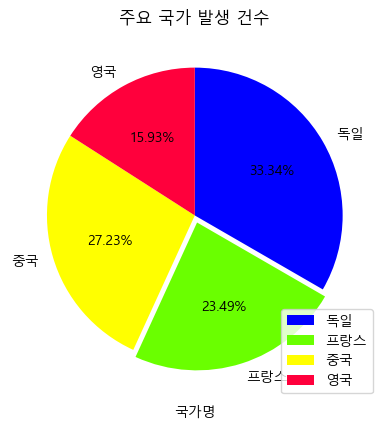

In [76]:
plt.figure()

plt.pie(chartdata, labels = mylabel, shadow = False, explode = (0, 0.05, 0, 0), colors = mycolors, autopct = '%1.2f%%', startangle = 90, counterclock = False)

plt.grid(True)
plt.legend(loc = 4)
plt.xlabel('국가명')
plt.title('주요 국가 발생 건수')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

pieChartExam_02.png파일이 저장되었습니다.


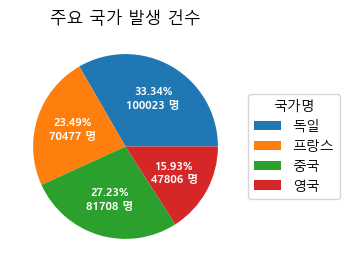

In [77]:
flg, ax = plt.subplots(figsize = (6, 3), subplot_kw = dict(aspect = 'equal'))

def getLabelFormat(pct, allvals) :
    absolute = int(pct / 100 * np.sum(allvals))
    return '{:.2f}%\n{:d} 명'.format(pct, absolute)

wedges, texts, autotexts = ax.pie(chartdata, autopct = lambda pct : getLabelFormat(pct, chartdata), textprops = dict(color = 'w'))

ax.legend(wedges, mylabel, title = '국가명', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight = 'bold')

ax.set_title('주요 국가 발생 건수')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

pieChartExam_03.png파일이 저장되었습니다.


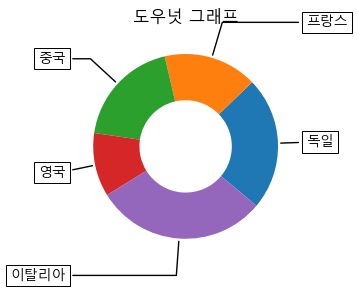

In [78]:
data = pd.read_csv(filename, index_col = '국가')

fig, ax = plt.subplots(figsize = (6, 3), subplot_kw = dict(aspect = 'equal'))

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']

data = data.loc[COUNTRY, ['4월06일']]

data.values.flatten()
wedges, texts = ax.pie(data.values.flatten(), wedgeprops = dict(width = 0.5), startangle = -40)

bbox_props = dict(boxstyle = 'square, pad = 0.3', fc = 'w', ec = 'k', lw = 0.72)

kw = dict(arrowprops = dict(arrowstyle = '-'), bbox = bbox_props, zorder = 0, va = 'center')

for i, p in enumerate(wedges) :
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1 : 'right', 1 : 'left'} [int(np.sign(x))]
    connectionstyle = 'angle, angleA = 0, angleB = {}'.format(ang)
    kw['arrowprops'].update({'connectionstyle' : connectionstyle})

    ax.annotate(COUNTRY[i], xy = (x, y), xytext = (1.3 * np.sign(x), 1.4 * y), horizontalalignment = horizontalalignment, **kw)

ax.set_title('도우넛 그래프')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

pieChartExam_05.png파일이 저장되었습니다.


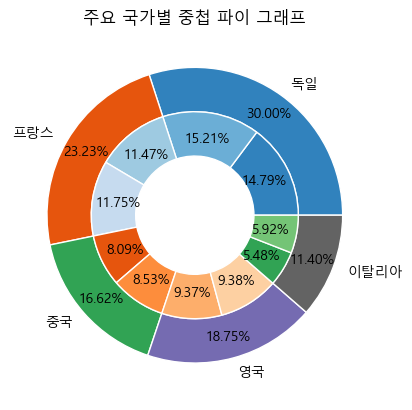

In [84]:
flg, ax = plt.subplots()

data = pd.read_csv(filename, index_col = '국가')

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
my_concern = [item for item in data.index if item in COUNTRY]

data = data.loc[my_concern]
filtered_data = data[['4월06일', '4월07일']]

totallist = []
for key in filtered_data.index.values :
    imsi = filtered_data.loc[key].values
    totallist.append([item for item in imsi])

chartdata = np.array(totallist)

color_su = len(COUNTRY)
cmap = plt.get_cmap('tab20c')

outer_colors = cmap(np.arange(color_su) * 4)
inner_colors = cmap(np.arange(2 * color_su))

cum_sum = chartdata.sum(axis = 1)


INNER_VACANT_CIRCLE_SIZE = 0.3
OUTER_PCTDISTANCE = 0.85

ax.pie(cum_sum, radius = 1, colors = outer_colors, wedgeprops = dict(width = INNER_VACANT_CIRCLE_SIZE, edgecolor = 'w'),
       labels = COUNTRY, autopct = '%.2f%%', pctdistance = OUTER_PCTDISTANCE)

INNER_PCTDISTANCE = 0.75

ax.pie(chartdata.flatten(), radius = 1 - INNER_VACANT_CIRCLE_SIZE, colors = inner_colors, wedgeprops = dict(width = INNER_VACANT_CIRCLE_SIZE, edgecolor = 'w'),
       autopct = '%.2f%%', pctdistance = INNER_PCTDISTANCE)

ax.set(aspect = 'equal', title = '주요 국가별 중첩 파이 그래프')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')
plt.show()

pieChartExam_06.png파일이 저장되었습니다.


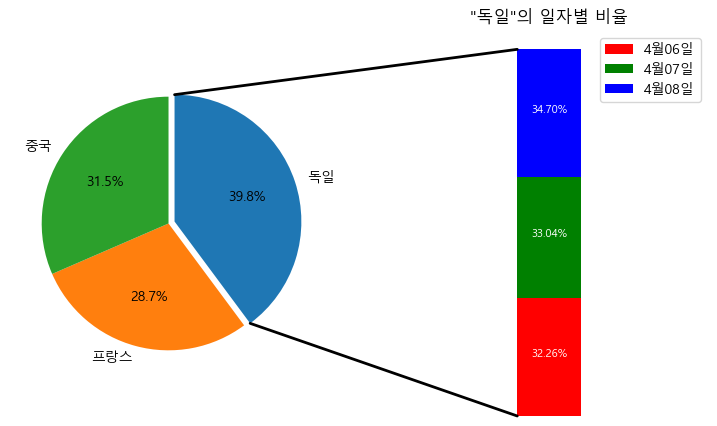

In [95]:
flg = plt.figure(figsize = (9, 5))
ax1 = flg.add_subplot(121)
ax2 = flg.add_subplot(122)
fig.subplots_adjust(wspace = 0)

data = pd.read_csv(filename, index_col = '국가')

COUNTRY = ['독일', '프랑스', '중국']
my_concern = [item for item in data.index if item in COUNTRY]

data = data.loc[my_concern]

when = ['4월06일', '4월07일', '4월08일']
filtered_data = data[when]

pieData = filtered_data.sum(axis = 1).values

barData = filtered_data.loc['독일'].values
barData = barData / sum(barData)

explode = [0 for idx in range(len(pieData))]
explode[0] = 0.05

STARTANGLE = 90

ax1.pie(pieData, autopct = '%1.1f%%', startangle = STARTANGLE, labels = COUNTRY, explode = explode, counterclock = False)

xpos = 0
bottom = 0
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]
colors = ['r', 'g', 'b']

for j in range(len(barData)) :
    height = barData[j]
    ax2.bar(xpos, height, width, bottom = bottom, color = colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, '%.2f%%' % (ax2.patches[j].get_height() * 100), ha = 'center', fontsize = 8, color = 'w')

ax2.set_title('"' + COUNTRY[0] + '"의 일자별 비율')
ax2.legend(when)
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

LINE_WIDTH = 2

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA = (-width / 2, bar_height), coordsA = ax2.transData, xyB = (x, y), coordsB = ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(LINE_WIDTH)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-width / 2, 0), coordsA = ax2.transData, xyB = (x, y), coordsB = ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(LINE_WIDTH)
ax2.add_artist(con)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')